In [2]:
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

import time
from datetime import date

### Data Sources
[FRED (Federal Reserve Economic Data)](https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation) - collects over 200,000 U.S. and international economic time series, from 69 different sources, on a single website. Data coverage includes all major areas of macroeconomic analysis: growth, inflation, employment, interest rates, exchange rates, production and consumption, income and expenditure, savings and investment, and more

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=12
Period for indexes: 1955-06-12 to 2025-06-12 


# 1) Understanding Data-Driven Decisions data pulls

### 1.1) GDP
[Real potential GDP](https://fred.stlouisfed.org/series/GDPPOT) - output the economy could produce  if its capital and labor resourses were used at a high rate. Adjasted remove the effect of inflation.

In [3]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [5]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1 # because quaterly data
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


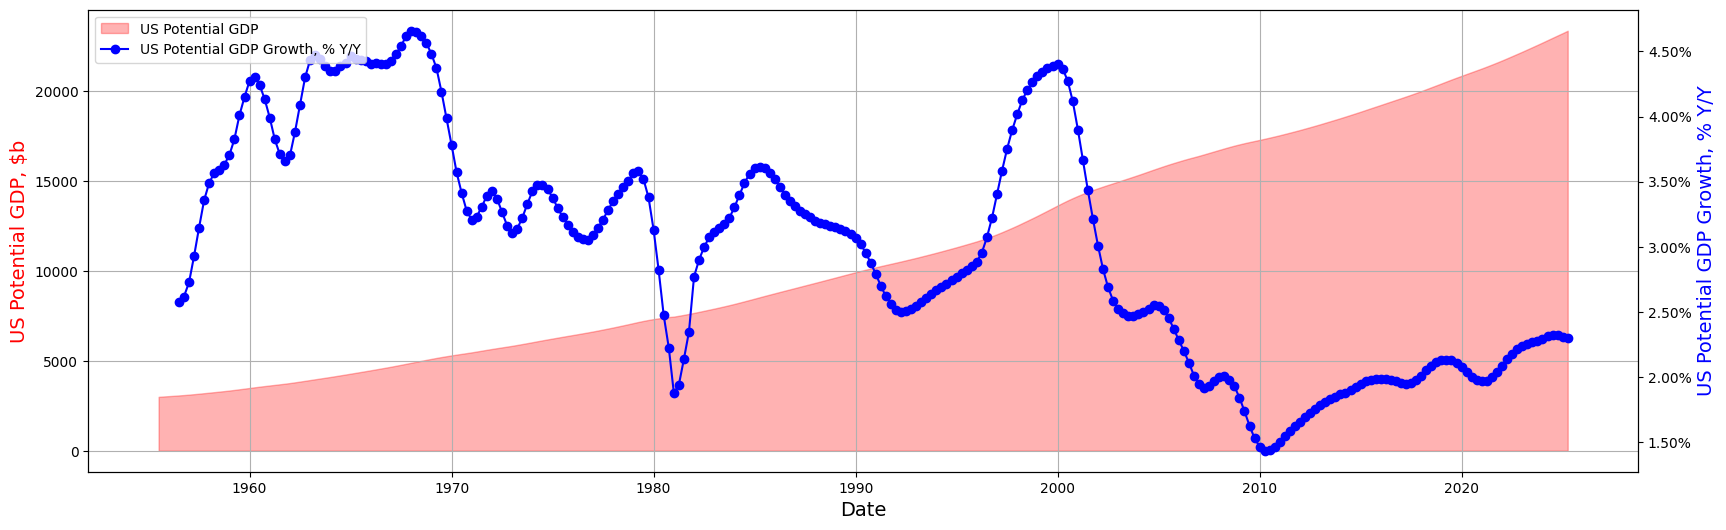

In [6]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Stable: +-2-2.3% YoY last 5 years

### 1.2) Inflation - CPI Core
[Consumer Price Index for All Urban Consumers: All Items Less Food and Energy](https://fred.stlouisfed.org/series/CPILFESL) - Do I save fater than inflation? is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy (because they have too volatile prices). It's 2.8% means that you need to save money more than 2.8% rate to save more than inflation.

[Daily inflation estimate from financial markets](https://fred.stlouisfed.org/series/T10YIE)

[Daily 'ex-ante' interest rate - cost of bottowing money](https://fredblog.stlouisfed.org/2022/05/constructing-ex-ante-real-interest-rates-on-fred/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

In [8]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [9]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


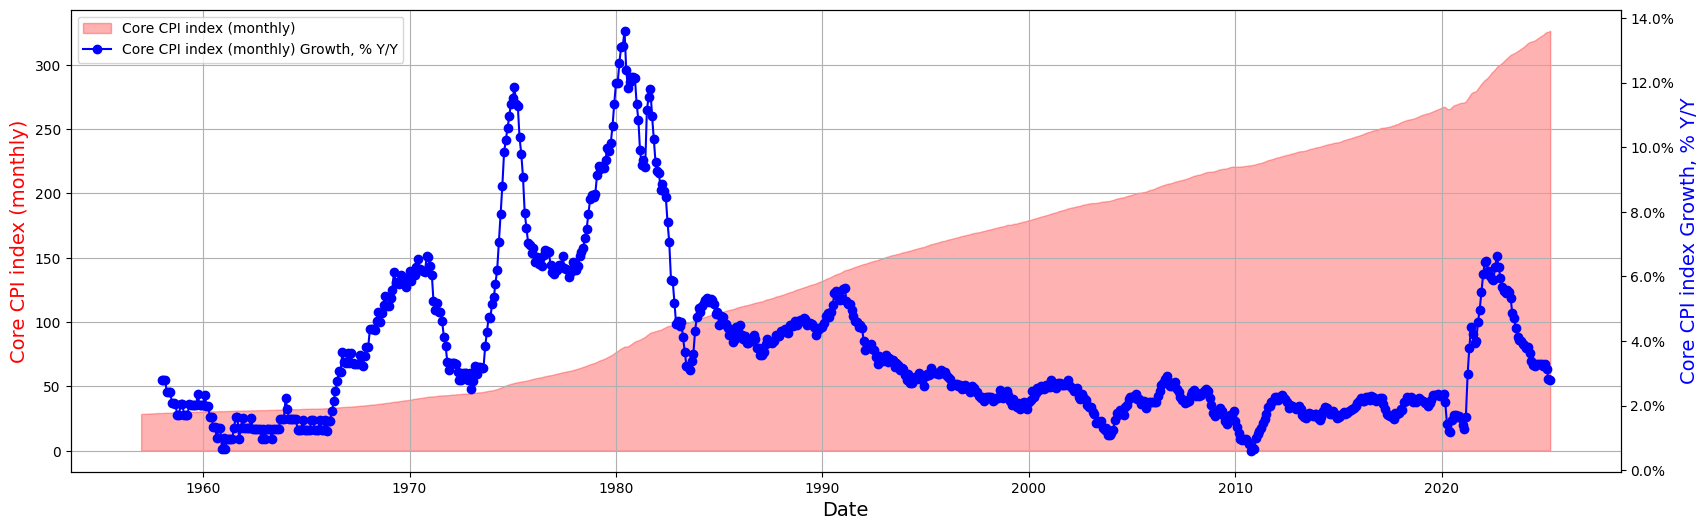

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Inflation decrease because many countries actively do policy for decreasing inflation

Saving money in cash brings you 2 - 3.25% (higher than inflation: 2.2 - 2.8%)
* do nothing (0%, safe, full liquidity)
* bank savings accounts (2-3%, money protection)
* money service businesses (2-4%, higher risk)
* broker accounts (3-4% on uninvested cash, higher risk)

### 1.3 Interest rates
[Fed Funds rate](https://fred.stlouisfed.org/series/FEDFUNDS) (most important for investing in US)\
Rate at which depository instistutions tarde federal funds with each other overnight. 4.33% latest value.

In [11]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33
2025-04-01,4.33


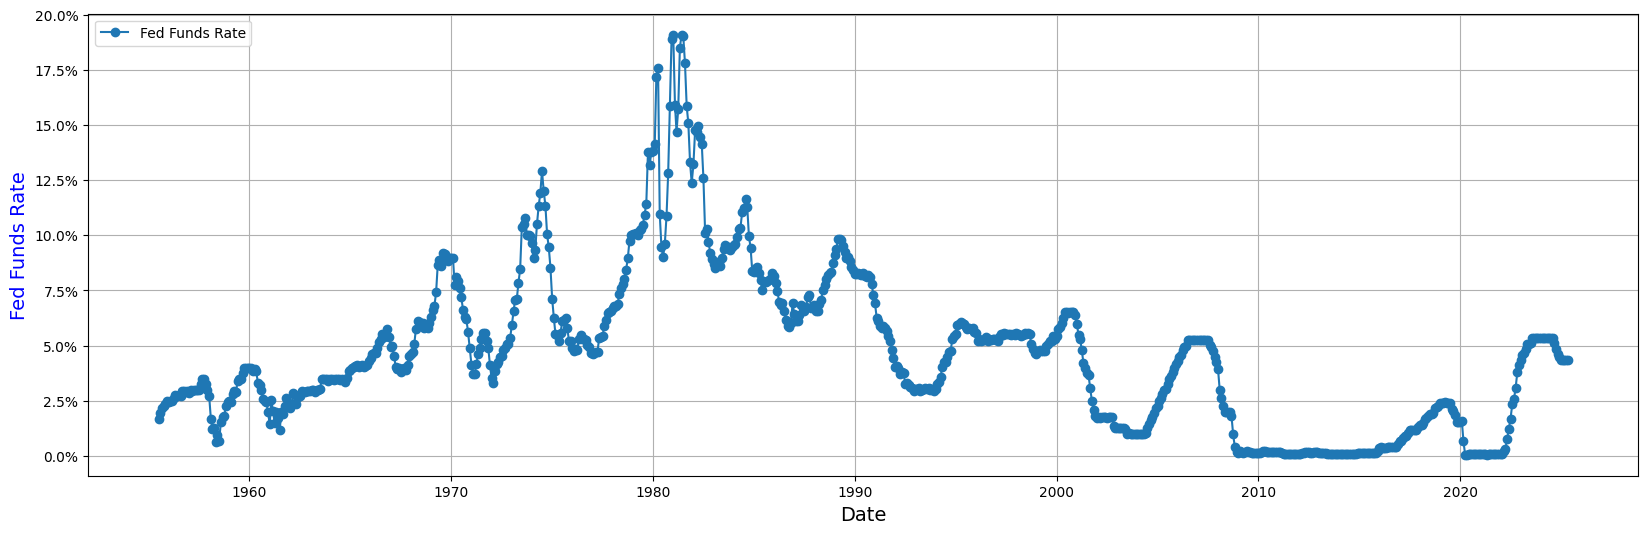

In [12]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

Higher rates on return on debt instruments (4-5%) -> 4.33% higher than cash rate 2.3%

In [13]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-29,4.13
2025-05-30,4.11
2025-06-02,4.12
2025-06-03,4.12
2025-06-04,4.06


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115

* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10 ...

In [14]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-29,4.00
2025-05-30,3.96
2025-06-02,4.01
2025-06-03,4.04
2025-06-04,3.93


### 1.4 SNP500
500 leading US companies - snapshot of the country's stock market health. Bencmark for investors.

In [3]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.127316e+09
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09


In [4]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [5]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.127316e+09,-0.005277,0.034988,0.124144
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09,0.000074,0.021939,0.131369
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09,0.005800,0.033267,0.140367
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09,0.004102,0.014739,0.127017
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09,-0.000081,-0.007190,0.114144


In [6]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

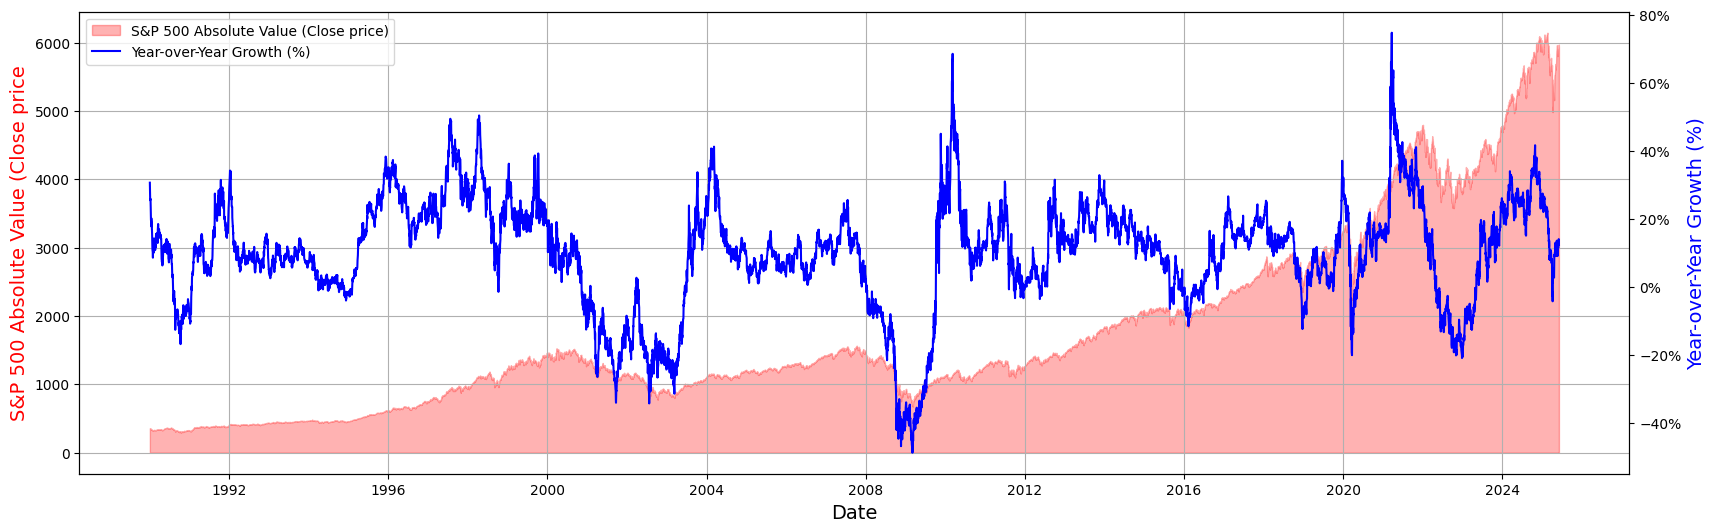

In [11]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

[heatmap of S&P companies](https://www.tradingview.com/heatmap/stock/#%7B%22dataSource%22%3A%22SPX500%22%2C%22blockColor%22%3A%22change%22%2C%22blockSize%22%3A%22market_cap_basic%22%2C%22grouping%22%3A%22sector%22%7D)

From 1990 to 2025 average return 10.31% (with adj inflation 7.54% per year)\
Have high volatility

# 2) Data Sources for Stocks

### 2.1 OHLCV data daily - INDEXES
INDEXES from Yahoo Finance\
DAX index (XETRA - XETRA Delayed Price. Currency in EUR)\
WEB: https://finance.yahoo.com/quote/%5EGDAXI - stock market index that tracks the performance of the 40 largest German companies listed on the Frankfurt Stock Exchange. It's considered a bellwether or barometer of the German economy and is one of the most popular stock market indices in the world. 


In [3]:
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [4]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-06 00:00:00+02:00,24304.369141,24355.029297,24214.529297,24304.460938,41235800,0.0,0.0
2025-06-09 00:00:00+02:00,24252.259766,24289.509766,24097.089844,24174.320312,35991400,0.0,0.0
2025-06-10 00:00:00+02:00,24156.529297,24168.589844,23964.769531,23987.560547,59033500,0.0,0.0
2025-06-11 00:00:00+02:00,23996.660156,24151.390625,23948.570312,23948.900391,62192700,0.0,0.0
2025-06-12 00:00:00+02:00,23768.050781,23809.150391,23618.849609,23637.509766,0,0.0,0.0


In [5]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [6]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
2025-06-06 00:00:00+02:00,24304.369141,24355.029297,24214.529297,24304.460938,41235800,0.0,0.0,18557.269531,0.309700
2025-06-09 00:00:00+02:00,24252.259766,24289.509766,24097.089844,24174.320312,35991400,0.0,0.0,18494.890625,0.307081
2025-06-10 00:00:00+02:00,24156.529297,24168.589844,23964.769531,23987.560547,59033500,0.0,0.0,18369.939453,0.305805
2025-06-11 00:00:00+02:00,23996.660156,24151.390625,23948.570312,23948.900391,62192700,0.0,0.0,18630.859375,0.285443
2025-06-12 00:00:00+02:00,23768.050781,23809.150391,23618.849609,23637.509766,0,0.0,0.0,18265.679688,0.294094


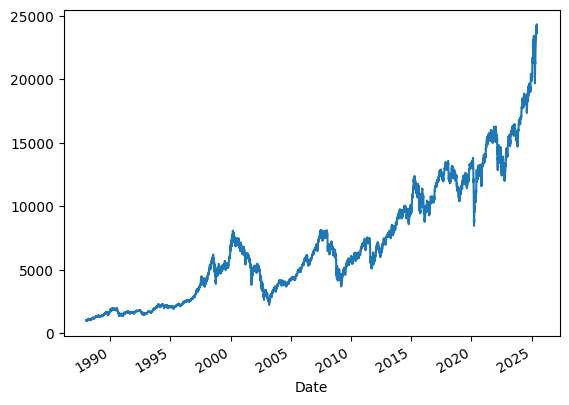

In [7]:
dax_daily['Close'].plot.line();

In [8]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily = yf.download(tickers = "^SPX",
#                      period = "max",
#                      interval = "1d")

In [9]:
snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-05 00:00:00-04:00,5985.669922,5999.700195,5921.200195,5939.299805,5091850000,0.0,0.0
2025-06-06 00:00:00-04:00,5987.060059,6016.870117,5978.629883,6000.359863,4355710000,0.0,0.0
2025-06-09 00:00:00-04:00,6004.629883,6021.310059,5994.180176,6005.879883,4642360000,0.0,0.0
2025-06-10 00:00:00-04:00,6009.910156,6043.009766,6000.279785,6038.810059,4882880000,0.0,0.0
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,0.0,0.0


In [10]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [11]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-05 00:00:00-04:00,5985.669922,5999.700195,5921.200195,5939.299805,5091850000,0.0,0.0
2025-06-06 00:00:00-04:00,5987.060059,6016.870117,5978.629883,6000.359863,4355710000,0.0,0.0
2025-06-09 00:00:00-04:00,6004.629883,6021.310059,5994.180176,6005.879883,4642360000,0.0,0.0
2025-06-10 00:00:00-04:00,6009.910156,6043.009766,6000.279785,6038.810059,4882880000,0.0,0.0
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,0.0,0.0


In [12]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
# 30 large, publicly owned blue-chip companies trading on the New York Stock Exchange (NYSE) and Nasdaq
ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")

In [13]:
dji_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-05 00:00:00-04:00,42487.890625,42601.449219,42211.691406,42319.738281,532850000,0.0,0.0
2025-06-06 00:00:00-04:00,42631.820312,42924.558594,42582.550781,42762.871094,414540000,0.0,0.0
2025-06-09 00:00:00-04:00,42786.191406,42893.089844,42567.550781,42761.761719,485780000,0.0,0.0
2025-06-10 00:00:00-04:00,42738.269531,42925.941406,42710.089844,42866.871094,446850000,0.0,0.0
2025-06-11 00:00:00-04:00,42882.859375,43115.691406,42738.621094,42865.769531,467260000,0.0,0.0


### 2.2 OHLCV data daily - ETFs
ETF (Exchange Traded Fund) is a type of investment fund that is traded on a stock exchange, similar to a stock. ETFs offer a way to invest in a basket of assets, like stocks, bonds, or commodities, in a single trade. 

In [4]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch

ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

# voo_etf = yf.download(tickers = "VOO",
#                      period = "max",
#                      interval = "1d")


In [5]:
voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-06-05 00:00:00-04:00,549.479980,550.630005,543.340027,545.090027,6372100,0.0,0.0,0.0
2025-06-06 00:00:00-04:00,550.299988,552.320007,548.700012,550.659973,4736000,0.0,0.0,0.0
2025-06-09 00:00:00-04:00,551.299988,552.700012,550.200012,551.250000,4516400,0.0,0.0,0.0
2025-06-10 00:00:00-04:00,551.780029,554.739990,550.739990,554.390015,5984100,0.0,0.0,0.0
2025-06-11 00:00:00-04:00,555.409973,556.229980,550.909973,552.859985,20791200,0.0,0.0,0.0


In [6]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(start = start, interval = "1d")

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

In [7]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4352, 8)


Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

In [8]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily['adj_close'] = epi_etf_daily['Close'] - epi_etf_daily['Dividends']
epi_etf_daily[epi_etf_daily.Dividends>0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,adj_close
Date,,,,,,,,,
2021-12-27 00:00:00-05:00,33.577710,33.801812,33.577710,33.764462,379100,0.192,0.0,0.0,33.572462
2022-03-25 00:00:00-04:00,33.563275,33.666313,33.432129,33.666313,584400,0.115,0.0,0.0,33.551313
2022-06-24 00:00:00-04:00,29.420325,29.778746,29.370545,29.768789,387900,1.845,0.0,0.0,27.923789
2023-06-26 00:00:00-04:00,34.020314,34.070182,33.960471,33.990395,634600,0.060,0.0,0.0,33.930395
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0,45.699000


In [9]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,adj_close
Date,,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0,45.869080
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0,45.899002
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0,45.699000
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0,45.639999


In [11]:
# Previous option : no Div. dates , same stats
epi_etf_daily2 = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [12]:
epi_etf_daily2[epi_etf_daily2.index>='2024-12-23'].head()

Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2024-12-23,45.869080,45.879052,45.609761,45.609761,630400
2024-12-24,45.899002,45.928922,45.709503,45.719475,277100
2024-12-26,45.820000,45.840000,45.700001,45.840000,685600
2024-12-27,45.639999,45.650002,45.500000,45.570000,774900
2024-12-30,45.090000,45.180000,44.980000,45.180000,1442100


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

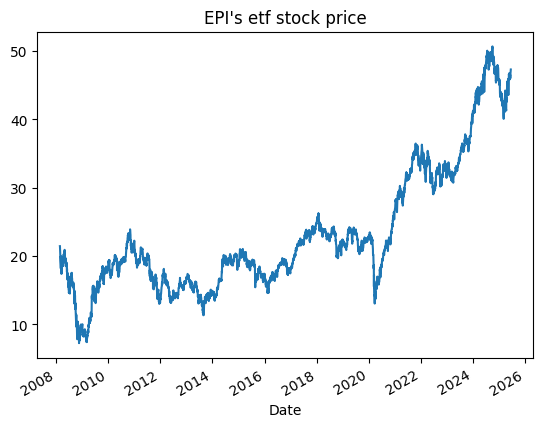

In [13]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [14]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [15]:
# get dividends as Series
epi.get_dividends().tail()

Date
2021-12-27 00:00:00-05:00    0.192
2022-03-25 00:00:00-04:00    0.115
2022-06-24 00:00:00-04:00    1.845
2023-06-26 00:00:00-04:00    0.060
2024-12-26 00:00:00-05:00    0.121
Name: Dividends, dtype: float64

In [16]:
# India's stock example
# https://www.nseindia.com/market-data/live-equity-market
EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [18]:
EICHERMOT.tail()

Price,Close,High,Low,Open,Volume
Ticker,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS
Date,,,,,
2025-06-06,5394.0,5405.0,5261.5,5290.5,538092
2025-06-09,5391.0,5444.0,5377.5,5422.0,270949
2025-06-10,5377.5,5426.0,5370.5,5426.0,330659
2025-06-11,5352.0,5434.5,5342.5,5370.0,366787
2025-06-12,5320.0,5375.0,5305.0,5351.0,244740


### 2.3 Paid data - Poligon.io (news endpoint) and Alpha Vantage

In [ ]:
# [Polygon.io] (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

In [ ]:
# [Alpha Vantage] (section "Data Sources"): https://pythoninvest.com/long-read/stock-screening-using-paid-data
# Endpoint: https://www.alphavantage.co/documentation/#fundamentals

### 2.4 Macroeconomics
some indicator examples: gold reserves vs. volatility

[Gold reserves excl. gold for China](https://fred.stlouisfed.org/series/TRESEGCNM052N)

In [19]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

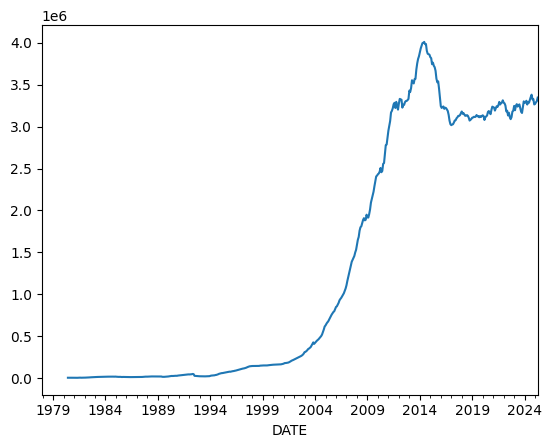

In [20]:
gold_reserves.TRESEGCNM052N.plot.line()

In [21]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

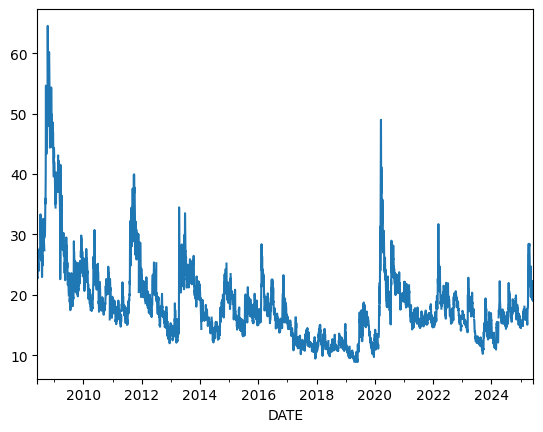

In [22]:
gold_volatility.GVZCLS.plot.line()

In [23]:
# Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

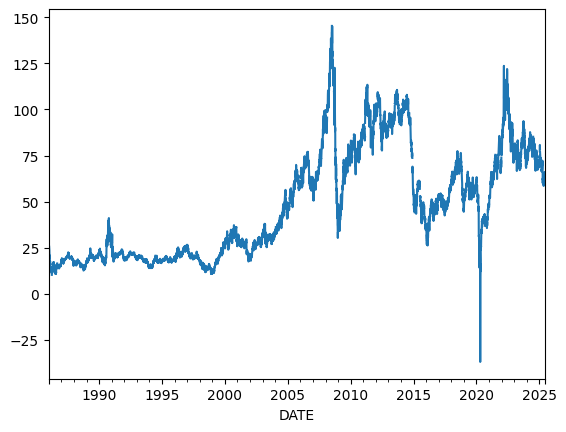

In [24]:
# negative price? - due to storage constraints and a lack of demand
oil_wti.DCOILWTICO.plot.line()

In [25]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

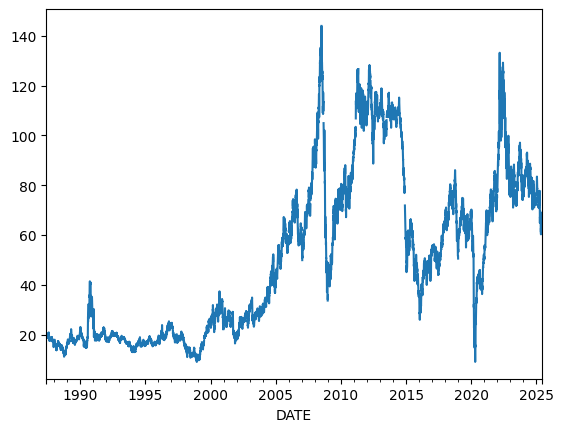

In [26]:
oil_brent.DCOILBRENTEU.plot.line()

In [27]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [28]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    98.14     98.63   165.00     70.70   
1               Stock Market  6001.00   6022.00  6153.00      4.40   
2            GDP Growth Rate    -0.20      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.10      2.50    13.40     -7.50   
4          Unemployment Rate     4.20      4.20    14.90      2.50   
5          Non Farm Payrolls   139.00    147.00  4631.00 -20471.00   
6             Inflation Rate     2.40      2.30    23.70    -15.80   
7         Inflation Rate MoM     0.10      0.20     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade   -61.62   -138.00     1.95   -138.00   
10           Current Account  -304.00   -310.00     9.96   -310.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

/var/folders/rj/25gyk3bn7_g60b0fxzrg3jn40000gq/T/ipykernel_46852/2360867701.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [29]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,98.14,98.63,165.00,70.70,NaN,Jun/25
1,Stock Market,6001.00,6022.00,6153.00,4.40,points,Jun/25
2,GDP Growth Rate,-0.20,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.10,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.20,4.20,14.90,2.50,percent,May/25
5,Non Farm Payrolls,139.00,147.00,4631.00,-20471.00,Thousand,May/25
6,Inflation Rate,2.40,2.30,23.70,-15.80,percent,May/25
7,Inflation Rate MoM,0.10,0.20,2.00,-1.80,percent,May/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,May/25
9,Balance of Trade,-61.62,-138.00,1.95,-138.00,USD Billion,Apr/25


### 2.5) Financial reporting - EDGAR (in Yahoo)
Electronic Data Gathering, Analysis and Retrieval system, is a massive U.S. government database on the finances of publicly traded corporations

In [30]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [31]:
# yearly financials for the last 4 years
nvda.financials

,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7339000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1543000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5986000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [32]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [34]:
# Basic info:
nvda.fast_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [36]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.fast_info['marketCap']/1e9

3483.28100750175

(https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html)

### 2.6 Web Scraping - company info for clustering

In [37]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})
    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]
        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)
        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [39]:
global_stocks = pd.read_csv("./global_stocks.csv")

In [40]:
global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

In [41]:
global_stocks.head(10)

,Rank,Name,Symbol,marketcap,price (USD),country,marketcap_b_usd
0,1,Microsoft,MSFT,3512767086592,472.62000,United States,3512.767087
1,2,NVIDIA,NVDA,3483281129472,142.83000,United States,3483.281129
2,3,Apple,AAPL,2968938348544,198.78000,United States,2968.938349
3,4,Amazon,AMZN,2263416307712,213.20000,United States,2263.416308
4,5,Alphabet (Google),GOOG,2159961964544,178.79000,United States,2159.961965
5,6,Meta Platforms (Facebook),META,1745297080320,694.14000,United States,1745.297080
6,7,Saudi Aramco,2222.SR,1599254537283,6.61245,Saudi Arabia,1599.254537
7,8,Broadcom,AVGO,1189170118656,252.91000,United States,1189.170119
8,9,TSMC,TSM,1110433988608,214.10000,Taiwan,1110.433989
9,10,Berkshire Hathaway,BRK-B,1053030350848,488.14000,United States,1053.030351


In [42]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             10372 non-null  int64  
 1   Name             10372 non-null  object 
 2   Symbol           10371 non-null  object 
 3   marketcap        10372 non-null  int64  
 4   price (USD)      10372 non-null  float64
 5   country          10372 non-null  object 
 6   marketcap_b_usd  10372 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 567.3+ KB


# Links
* [stock screener](https://www.tradingview.com/screener/): hand rule: SP500; dividend yield > 2%; revenue growth > 0% YoY; price-to-earnings growth (PEG ratio) < 0.5; Upcoming earnings date = Next week
* [yfinance guide](https://www.qmr.ai/yfinance-library-the-definitive-guide/)
* [yfinance guide2](https://analyzingalpha.com/yfinance-python)
* [yfinance guide3](https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html)
* [assets info](https://finance.yahoo.com/markets/)
* [yfinance guide4](https://rfachrizal.medium.com/how-to-obtain-financial-statements-from-stocks-using-yfinance-87c432b803b8)
* [US macro indicators](https://tradingeconomics.com/united-states/indicators)
* [Global interest rates](https://tradingeconomics.com/country-list/interest-rate)
* [DE stock market](https://tradingeconomics.com/germany/stock-market)
* [Get 10K from EDGAR code](https://gist.github.com/anshoomehra/ead8925ea291e233a5aa2dcaa2dc61b2)
* [Get 10K from EDGAR article](https://medium.com/@jan_5421/how-to-download-and-scrape-10-k-filings-from-sec-edgar-b0d245fc8d48)
* [Get 10K from EDGAR code2](https://sec-api.io/resources/extract-textual-data-from-edgar-10-k-filings-using-python)
* [Most profitable companies](https://companiesmarketcap.com/most-profitable-companies/)
* [Google trends](https://hackernoon.com/how-to-use-google-trends-api-with-python)
* [Funds stats](https://hedgefollow.com/funds/Renaissance+Technologies)